<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Create-overview-map-with-custom-legend" data-toc-modified-id="Create-overview-map-with-custom-legend-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create overview map with custom legend</a></span></li><li><span><a href="#Zooming-in" data-toc-modified-id="Zooming-in-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Zooming in</a></span></li><li><span><a href="#Seperate-cut-out-map" data-toc-modified-id="Seperate-cut-out-map-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Seperate cut-out map</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


## Intro 

This notebook is result of additional research/fiddling/hacking around creating geographical maps.

While geopandas takes a lot complexity out of the equation it is clear that the combination of Geopandas and Matplotlib is not yet as stable and robust as some other python libraries and domains.

This is a report out of what works.

Specifically this notebook is looking at:
- Zooming in/creating cut-out of maps
- Creating legends

Unsolved remains:

- Overlapping labels
- Creating a railroad track line

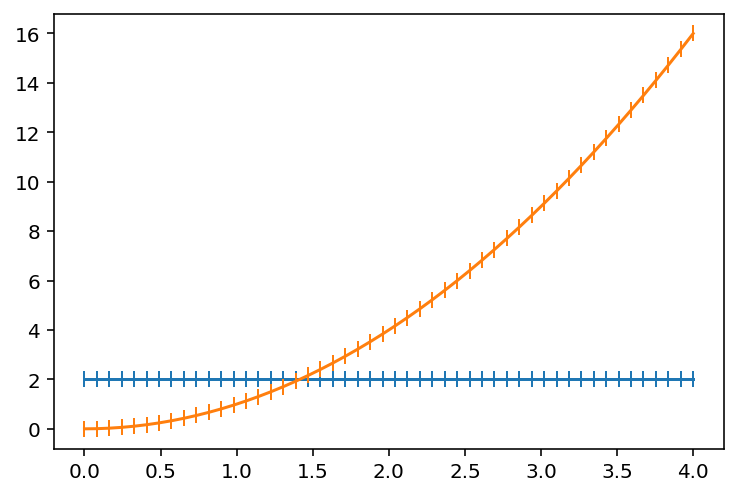

In [2]:
x=np.linspace(0,4,50)
y=[2]*50
y_= x**2
plt.plot(x, y, marker='|', markersize=8)
plt.plot(x,y_, marker='|', markersize=8);

## Load data



In [3]:
# define data directory
shapedir='/Users/maartenk/Documents/git/CookBooks/Sources/ShapeFiles/Sweden_shapefile/ok_riks_Sweref_99_TM_shape/oversikt/riks/'

# read files
boundary = 'al_riks.shp' 
boundary_fp = shapedir+boundary
map_df_sweden_boundary = gpd.read_file(boundary_fp)

landuse = 'my_riks.shp' 
landuse_fp = shapedir+landuse
map_df_sweden_landuse = gpd.read_file(landuse_fp)

rail = 'jl_riks.shp' 
rail_fp = shapedir+rail
map_df_sweden_rail = gpd.read_file(rail_fp)

road = 'vl_riks.shp' 
road_fp = shapedir+road
map_df_sweden_road = gpd.read_file(road_fp)


In [4]:
# read and inspect files

file = 'my_riks.shp' 
file_fp = shapedir+file
map_df_sweden = gpd.read_file(file_fp)
print(f'Columns: {map_df_sweden.columns.values.tolist()}\n')

print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_sweden['KKOD'].value_counts().index.format(),
                  map_df_sweden['KATEGORI'].value_counts().values.tolist(),
               map_df_sweden['KATEGORI'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

Columns: ['KKOD', 'KATEGORI', 'NAMN1', 'NAMN2', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
901 	 40357 	 Vattenyta
611 	 38577 	 Öppen mark
601 	 34208 	 Skogsmark
911 	 22339 	 Sankmark
303 	 2113 	 Tätort
631 	 1372 	 Kalfjäll
302 	 861 	 Annan koncentrerad bebyggelse
641 	 273 	 Glaciär
902 	 139 	 Hav, territorialt vatten
612 	 22 	 Alvarmark


In [5]:
# function to read, inspect data and save as GeoPandas df

def loaddata(infile):
 
    file_fp = shapedir+infile
    outfile = gpd.read_file(file_fp)
    print(f'Columns: {outfile.columns.values.tolist()}\n')

    print('KOD \t FREQ \t KATEGORI')
    print('--- \t ---- \t --------')
    for x,y, z in zip(outfile['KKOD'].value_counts().index[1:].format(),
                      outfile['KATEGORI'].value_counts().values[1:].tolist(),
                   outfile['KATEGORI'].value_counts().index[1:].format()):
        print(x,'\t', y,'\t', z)
        
    return outfile

In [6]:
map_df_sweden_names = loaddata('tx_riks.shp')

Columns: ['TEXT', 'KKOD', 'KATEGORI', 'TJUST', 'TSPARR', 'TRIKT', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
1   	 10855 	 Enstaka hus eller gård
52  	 10330 	 Naturnamn, små områden
76  	 8881 	 Höjdvärde
82  	 6206 	 Vattenyta, mycket litet område
5   	 1593 	 Tätort, 200-1999 inv
18  	 1574 	 Församlingskyrka
92  	 1463 	 Vattendrag, litet
12  	 1250 	 Tätortsdel, liten
3   	 1181 	 Stor by
98  	 918 	 Sankmark, liten
79  	 848 	 Vägnummer, riks- och länsväg
53  	 470 	 Naturnamn, litet område
61  	 402 	 Upplysningstext, liten
10  	 392 	 Annan konc bebyggelse, liten
83  	 309 	 Vattenyta, litet område
80  	 287 	 Trafikplatsnummer
11  	 239 	 Annan konc bebyggelse, stor
81  	 235 	 Vägnummer, europaväg
27  	 211 	 Offentlig byggnad t.ex. skola, slott m.m.
41  	 194 	 Naturreservat, litet
33  	 181 	 Landskap
7   	 179 	 Tätort, 2000-9999 inv
71  	 150 	 Industri, gruva, fyr, sluss, damm m.m.
107 	 141 	 Tätort, kommuncentrum, 2 000 - 9 999 inv
17  	 110 	 Ann

## Create overview map with custom legend

Turns out Matplotlib does not support legend handles automatically for Polygon geometries in geopandas. 
(https://github.com/geopandas/geopandas/issues/660). Creating a legend artist for every layer is the only workaround.
For lines and point  it does and in that case simply declaring a 'label = 'label'' with a 'plt.legend' would suffice.

This also illustrates the overlapping labels issue

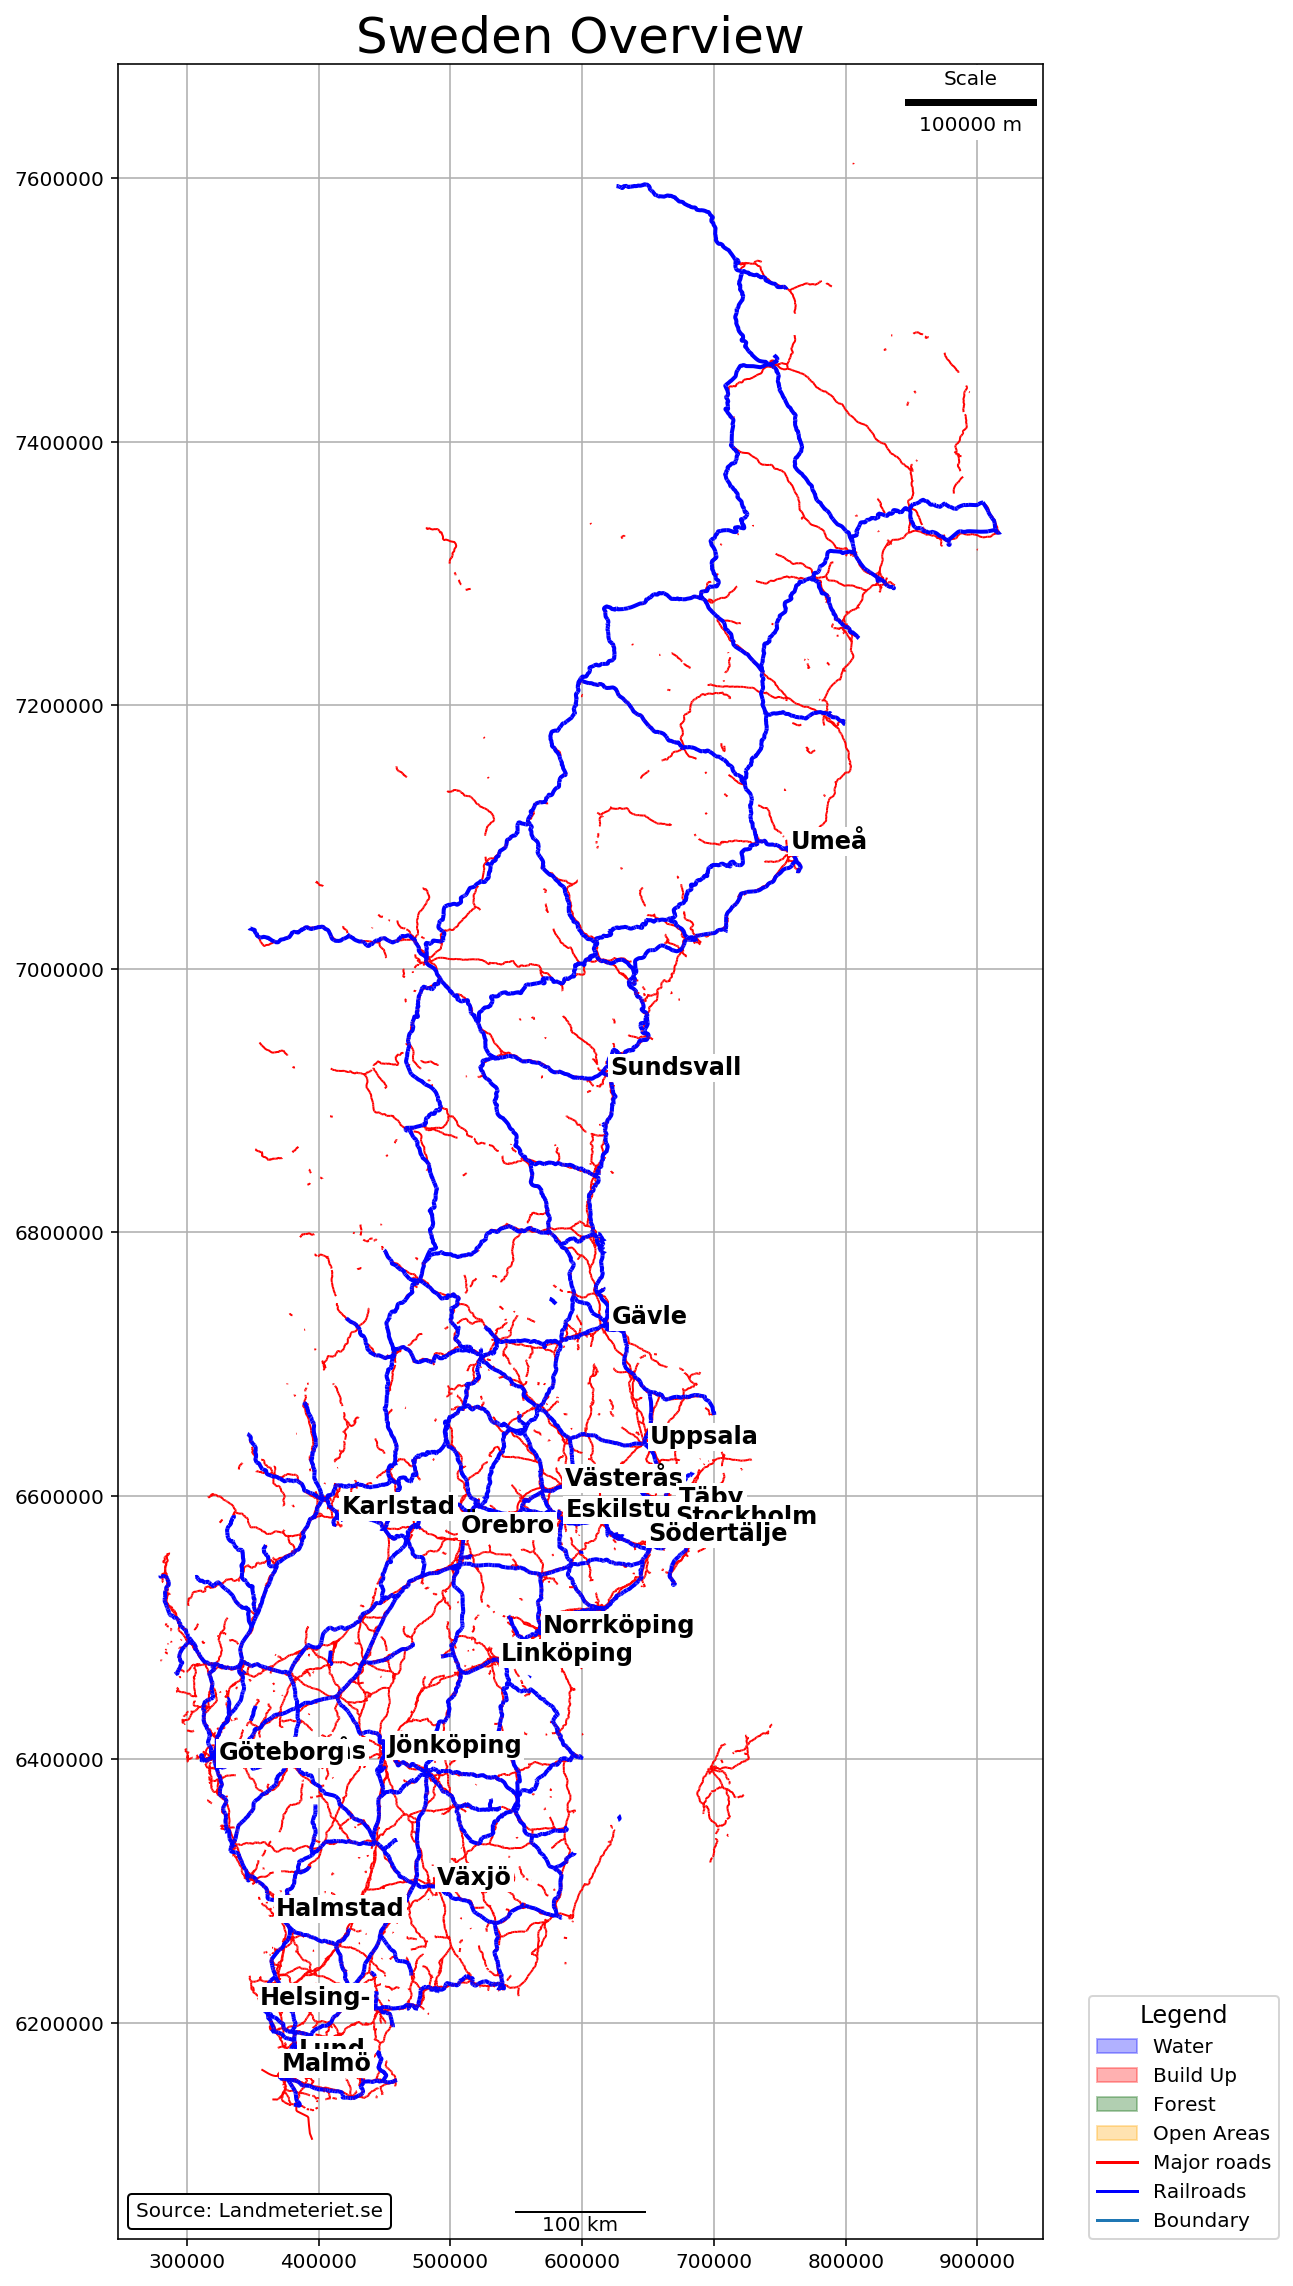

In [43]:
#Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .3
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

#define layers
# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
#     ax=ax, facecolor='blue',alpha=alpha, label='Water')
# water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
#     ax=ax, facecolor='red', alpha=alpha, label='Build-up')
# buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
#     ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
# forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

# map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
#     ax=ax, facecolor='orange', alpha=alpha, label='Open area')
# open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

#create text labels
names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                         texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
                    road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
           loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')
scalebar = AnchoredSizeBar(ax.transData,
                           100000, '100 km', 'lower center', 
                           pad=.1,
                           color='black',
                           frameon=False,
                           size_vertical=10)#,
#                            fontproperties=fontprops)

from matplotlib_scalebar.scalebar import ScaleBar
Scalebar = ScaleBar(dx=1, 
                    fixed_value=100000, 
                    height_fraction=.003, 
                    label = 'Scale', 
                    frameon=True,
                    ) # 1 pixel = 0.2 meter
ax.add_artist(Scalebar)

ax.add_artist(scalebar)

plt.show()

## Zooming in

Getting an entire country is one thing but more often zooming in on a specific area is required. The good news is that setting limits on the axes actually suffices to achieve this. The downside can be that this merely renders a window on the original (large) dataset. This may be computationally expensive. One option is to limit the dataset to the zoom area. Given the internals of Geopandas it is good to set the data limits a little wider than the zoom limits: if a polygon is not *entirely* within the set data limits it gets left out.

There are 2 complications:

1. The documentation indicates that the cx function can be called on a GeoDataFrame. This is unfortuneately not always the case. The route that always works is slicing by creating a mask on the GeoDataFrame['geometry'] GeoSeries.

2. Labels are plotted (in Matplotlib) from python lists. Geopandas slicing does not work on lists. This means that labels lists need to be specifically tailored for the plot.  

>Note on labels. In order to keep labels *within* the limits of the plot (for aesthetic purposes), it is best to limit the points with labels within the map limits.

In [44]:
#set map limits
mapxwest = 400000
mapxeast = 600000
mapysouth = 6400000
mapynorth = 6600000

#set data limits
shapexwest = mapxwest * .9
shapexeast = mapxeast * 1.1
shapeysouth = mapysouth * .9
shapeynorth = mapynorth * 1.1

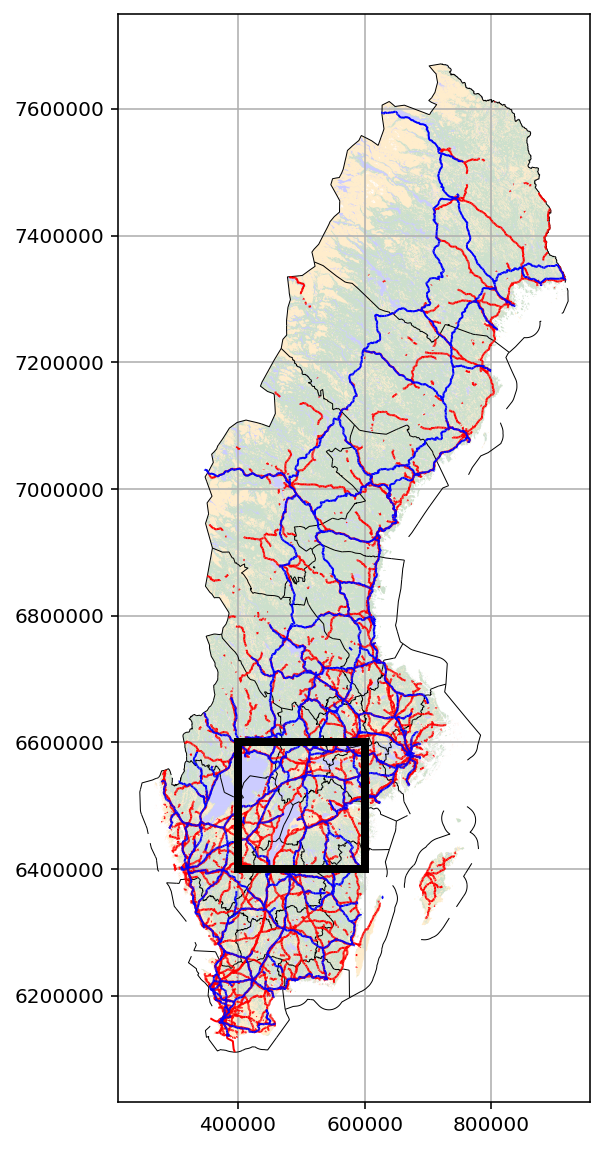

In [72]:
#Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText

# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .2
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(10,10)) 
ax = plt.axes()

# define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=1, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

ax.grid(True)
#add cut-out box
rect = mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=4, edgecolor='black', fc='none', zorder=1000)
ax.add_patch(rect)


# ax.axis('off')

plt.show()

## Seperate cut-out map

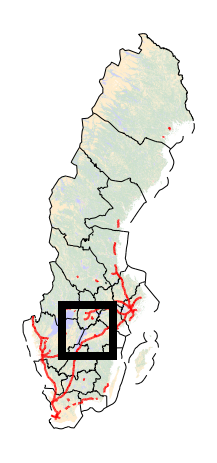

In [86]:
#Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText

# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .2
source = 'Landmeteriet.se'

#Define fig,ax
fig1 = plt.figure() 
ax1 = plt.axes()

# define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax1, facecolor='blue',alpha=alpha, label='Water')


map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax1, facecolor='red', alpha=alpha, label='Build-up')


map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax1, facecolor='darkgreen', alpha=alpha, label='forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax1, facecolor='orange', alpha=alpha, label='Open area')


map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax1, edgecolor='black', lw=.5)


map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5200].plot(ax=ax1,color='red', lw=1)#,path_effects=[outline])


map_df_sweden_rail.plot(ax=ax, color='blue', lw=1, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

ax1.grid(True)
#add cut-out box
rect = mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=4, edgecolor='black', fc='none', zorder=1000)
ax1.add_patch(rect)


ax1.axis('off')

plt.show()

In [54]:
import matplotlib.patheffects as mpe

outline = mpe.withStroke(linewidth=8, foreground='red')
alpha = .3
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

#Define map limits
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)

#define layers
# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
#     ax=ax, facecolor='blue',alpha=alpha, label='Water')
# water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
#     ax=ax, facecolor='red', alpha=alpha, label='Build-up')
# buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

# map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
#     ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
# forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

# map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
#     ax=ax, facecolor='orange', alpha=alpha, label='Open area')
# open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

# map_df_sweden_road.loc[(map_df_sweden_road['KKOD'] > 5100) &(map_df_sweden_road['KKOD'] < 5300)].plot(ax=ax,color='red')#, lw=1,path_effects=[outline])
# road_line = mlines.Line2D([], [], color='red', label='Major roads')

# map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5100].plot(ax=ax,color='white', lw=2,path_effects=[outline])
# freeway_line = mlines.Line2D([], [], color='white', path_effects=[outline], label='Freeway')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

#create text labels

bounds=map_df_sweden_names['geometry'].cx[mapxwest:mapxeast*.97,mapysouth:mapynorth]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107]))]
# names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                         texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, freeway_line, 
                    road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
           loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')


scalebar = AnchoredSizeBar(ax.transData
                           10000, '10 km', 'lower right',
                           pad=1,
                           borderpad=1,
                           color='black',
                           frameon=True,
                           size_vertical=15)#,
#                            fontproperties=fontprops)

from matplotlib_scalebar.scalebar import ScaleBar
Scalebar = ScaleBar(dx=1, 
                    fixed_value=100000, 
                    height_fraction=.003, 
                    label = 'Scale', 
                    frameon=True,
                    ) # 1 pixel = 0.2 meter
ax.add_artist(Scalebar)

ax.add_artist(scalebar)

plt.show()

SyntaxError: invalid syntax (<ipython-input-54-929d381a917f>, line 78)

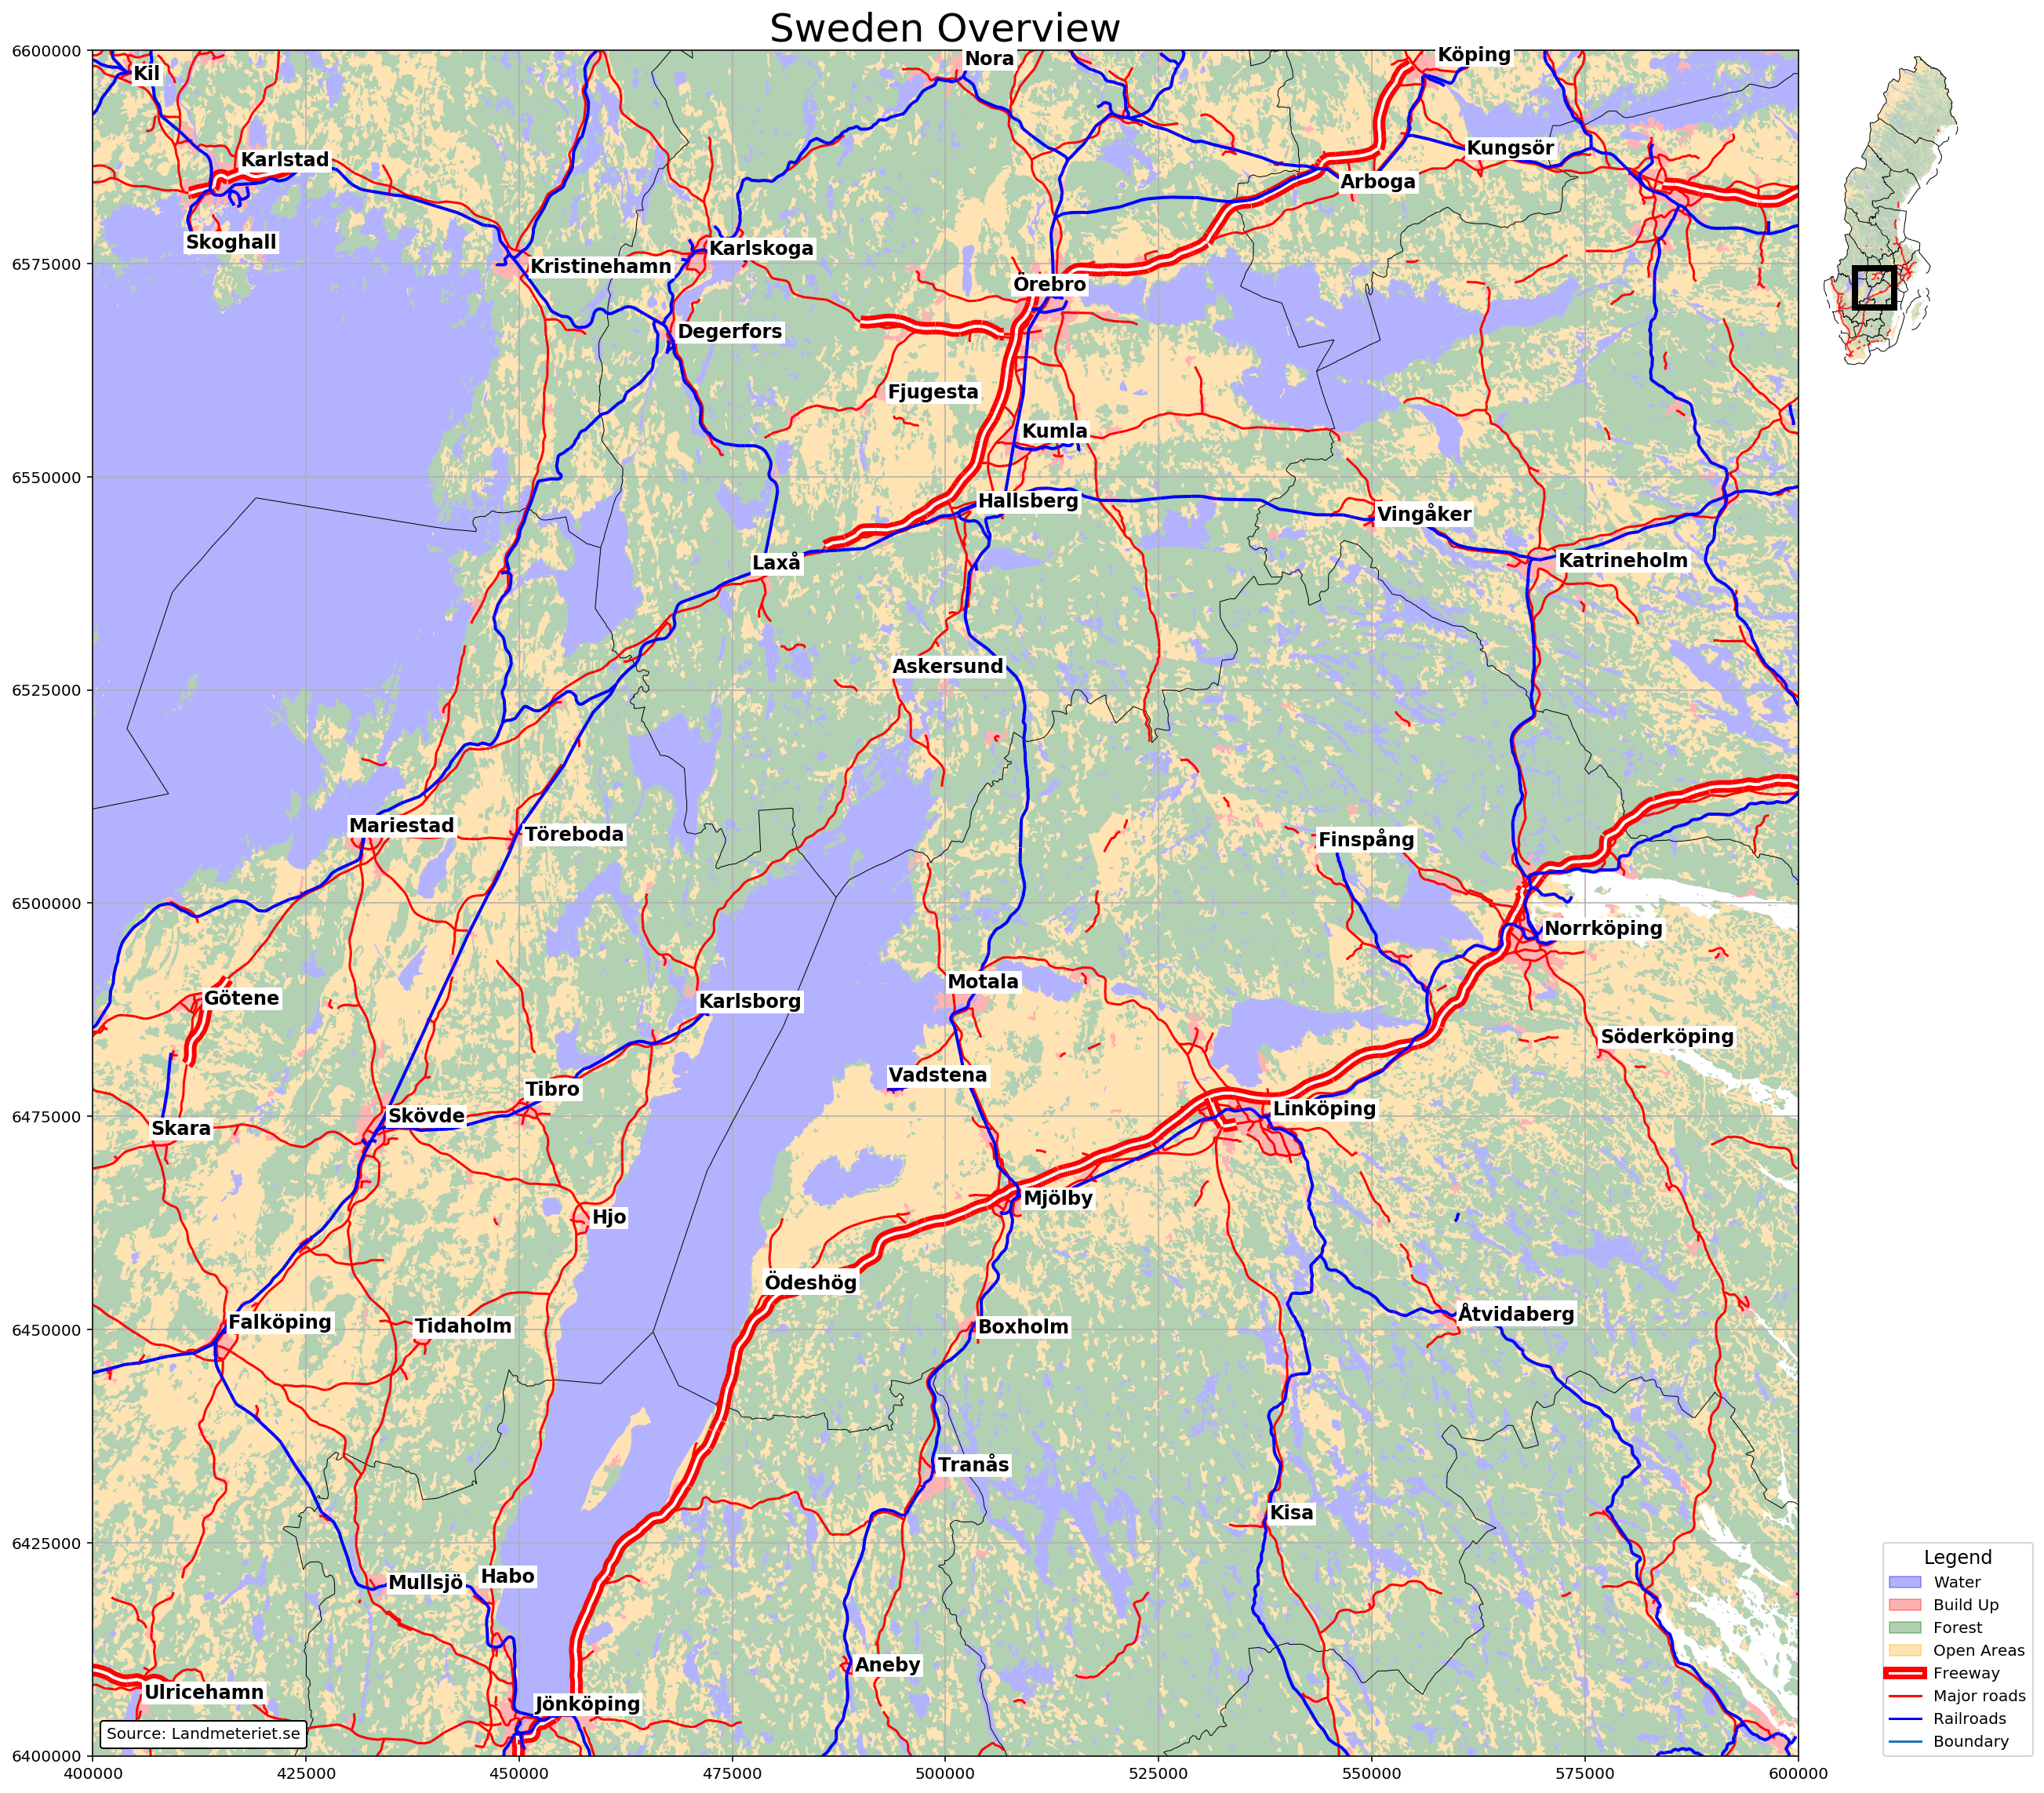

In [35]:
import matplotlib.patheffects as mpe

outline = mpe.withStroke(linewidth=8, foreground='red')
alpha = .3
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()
# fig, ax = plt.subplots(figsize=(20,20))

# ax = plt.axes()

#Define map limits
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)

#define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[(map_df_sweden_road['KKOD'] > 5100) &(map_df_sweden_road['KKOD'] < 5300)].plot(ax=ax,color='red')#, lw=1,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5100].plot(ax=ax,color='white', lw=2,path_effects=[outline])
freeway_line = mlines.Line2D([], [], color='white', path_effects=[outline], label='Freeway')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

#create text labels

bounds=map_df_sweden_names['geometry'].cx[mapxwest:mapxeast*.97,mapysouth:mapynorth]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107]))]
# names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                         texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, freeway_line, 
                    road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
           loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

#add small inset
from mpl_toolkits.axes_grid.inset_locator import inset_axes
ax1 = inset_axes(ax, width=1.5, height=3, loc='upper left', bbox_to_anchor= (1.0, 1.01),bbox_transform=ax.transAxes)

# define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax1, facecolor='blue',alpha=alpha, label='Water')
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax1, facecolor='red', alpha=alpha, label='Build-up')
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax1, facecolor='darkgreen', alpha=alpha, label='forest')
map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax1, facecolor='orange', alpha=alpha, label='Open area')
map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax1, edgecolor='black', lw=.5)
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5200].plot(ax=ax1,color='red', lw=1)#,path_effects=[outline])
# map_df_sweden_rail.plot(ax=ax1, color='blue', lw=1, label='railroad')
ax1.grid(True)
#add cut-out box
rect = mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=4, edgecolor='black', fc='none', zorder=1000)
ax1.add_patch(rect)
ax1.axis('off')



plt.show()

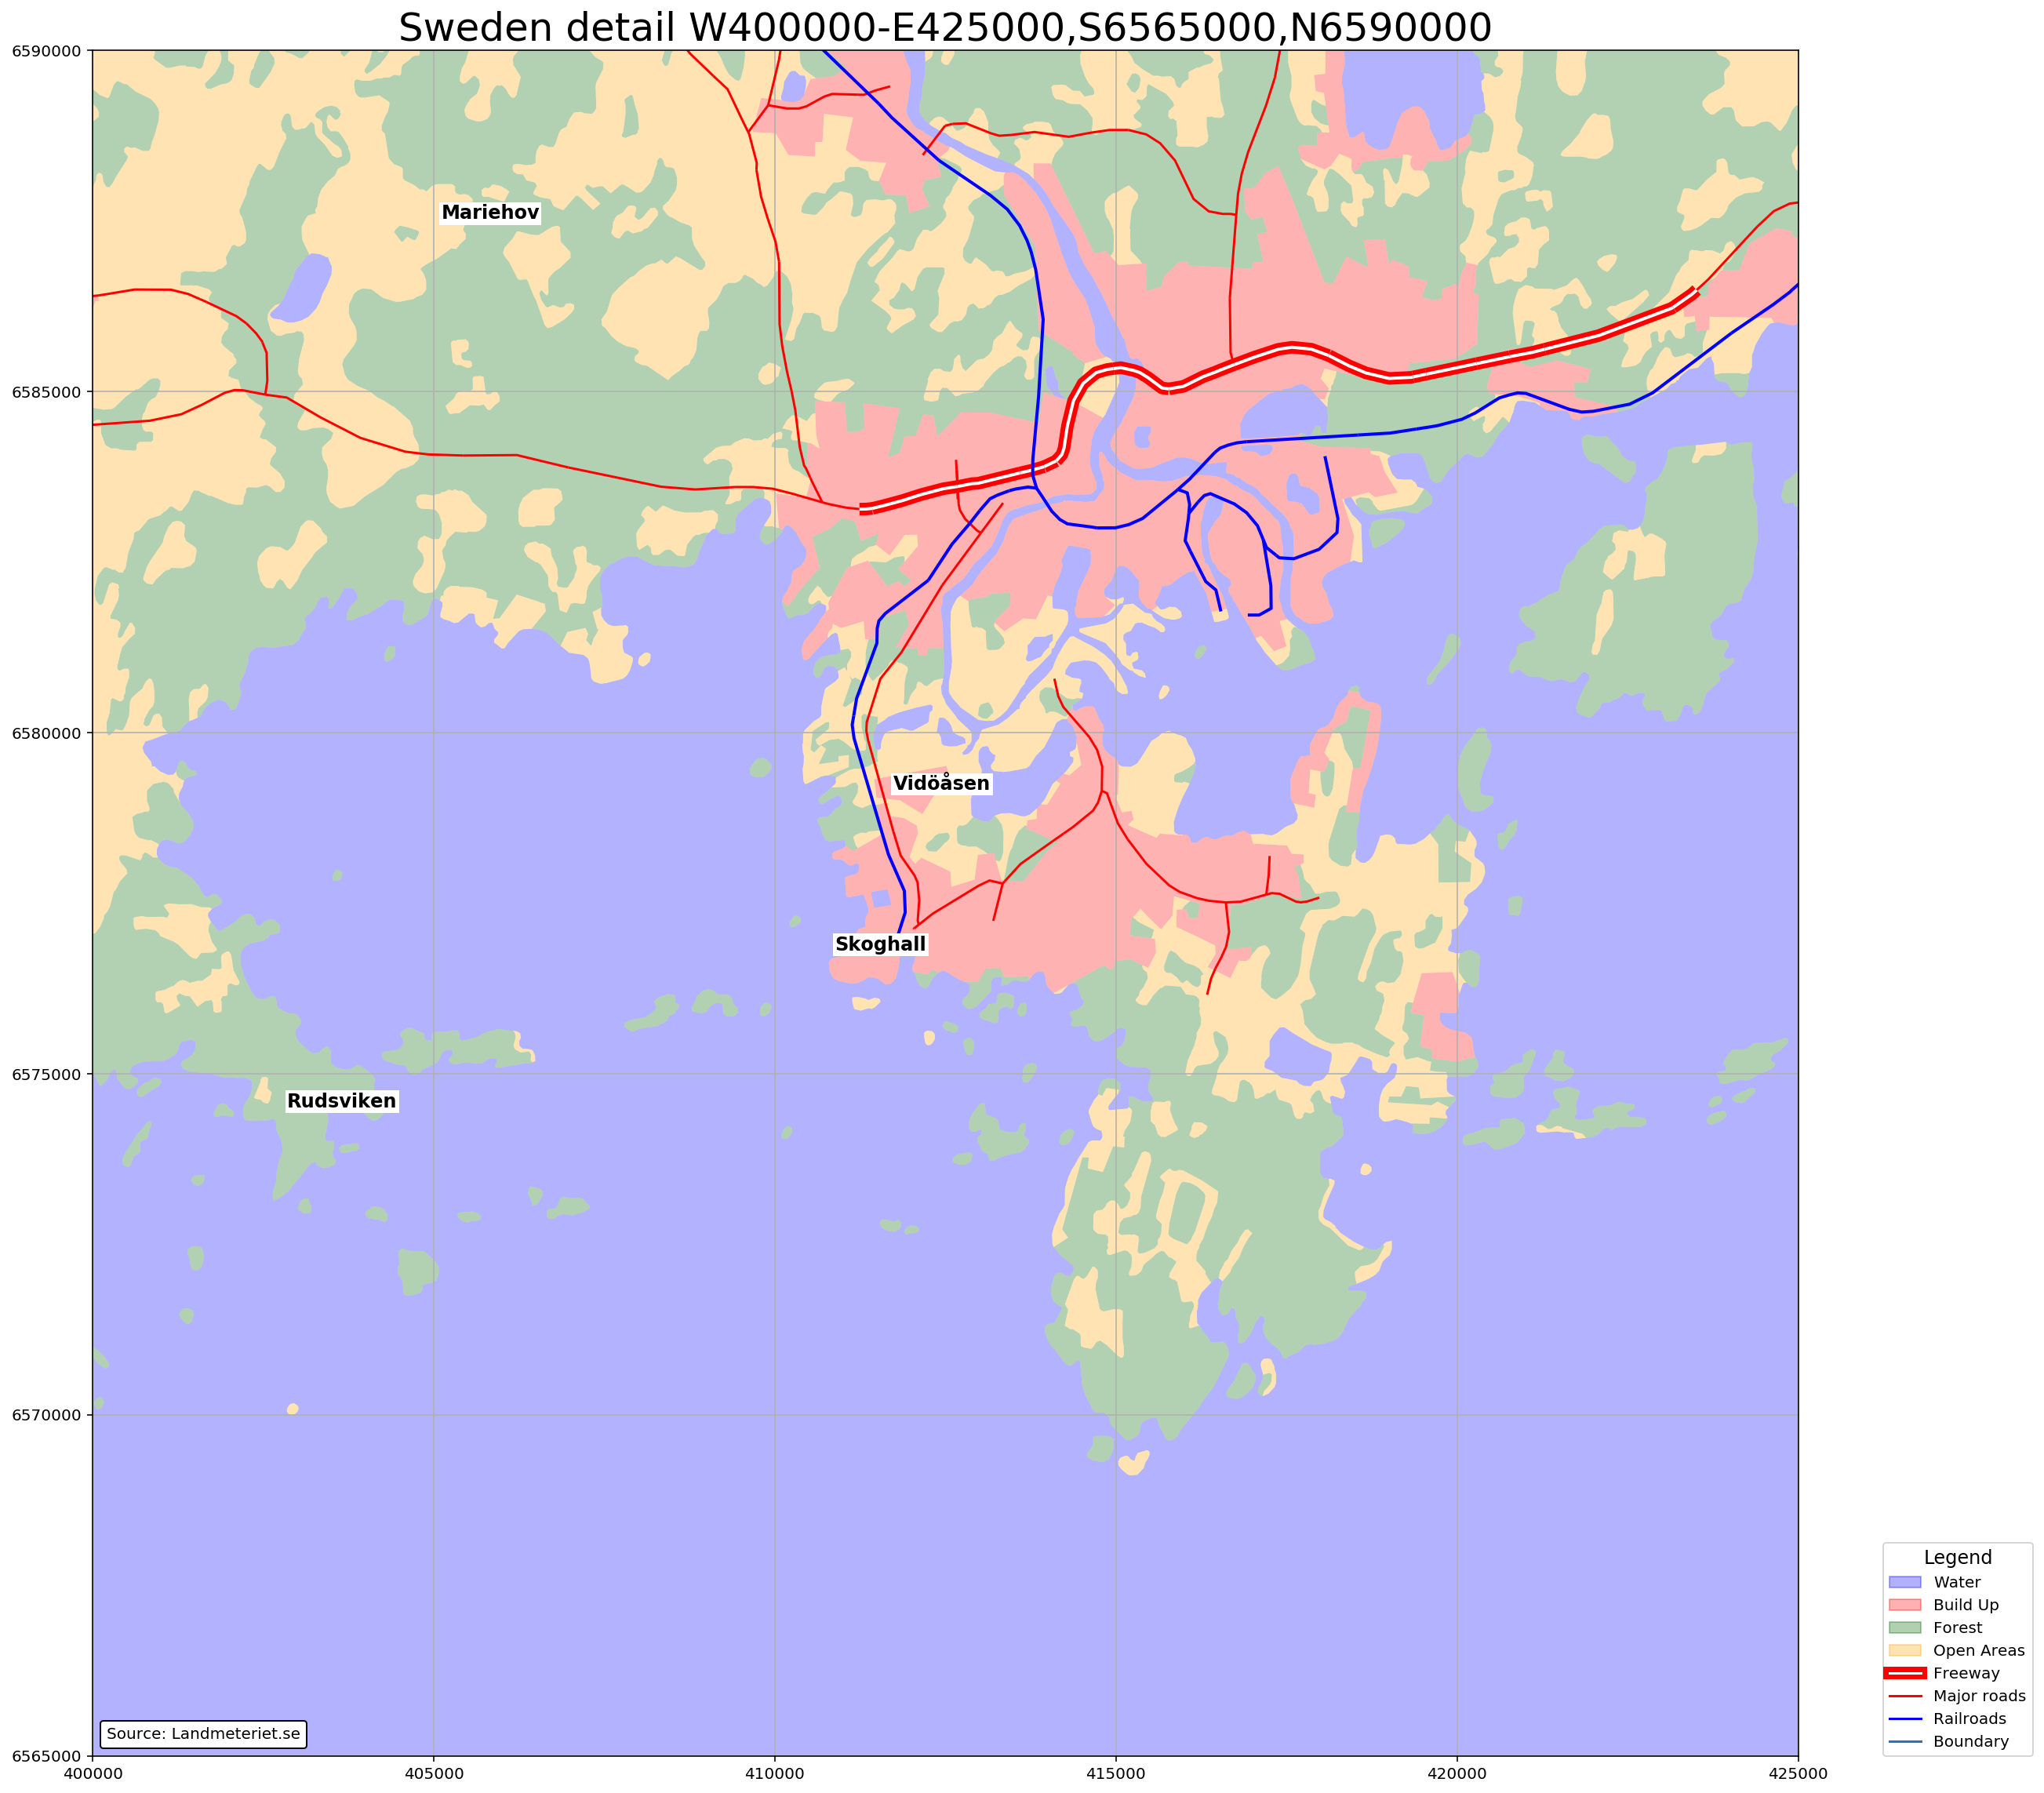

In [121]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='red')


mapxwest,mapxeast = 400000,425000
mapysouth, mapynorth = 6565000,6590000

plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)



#define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[(map_df_sweden_road['KKOD'] > 5100) &(map_df_sweden_road['KKOD'] < 5300)].plot(ax=ax,color='red')#, lw=1,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5100].plot(ax=ax,color='white', lw=2,path_effects=[outline])
freeway_line = mlines.Line2D([], [], color='white', path_effects=[outline], label='Freeway')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads') 

#select data for labels
bounds=map_df_sweden_names['geometry'].cx[mapxwest:mapxeast*.97,mapysouth:mapynorth]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107, 5, 105, 7, 1]))]

texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
        
#add title     
ax.set_title(f'Sweden detail W{mapxwest}-E{mapxeast},S{mapysouth},N{mapynorth}', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, freeway_line, 
                    road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

plt.show()

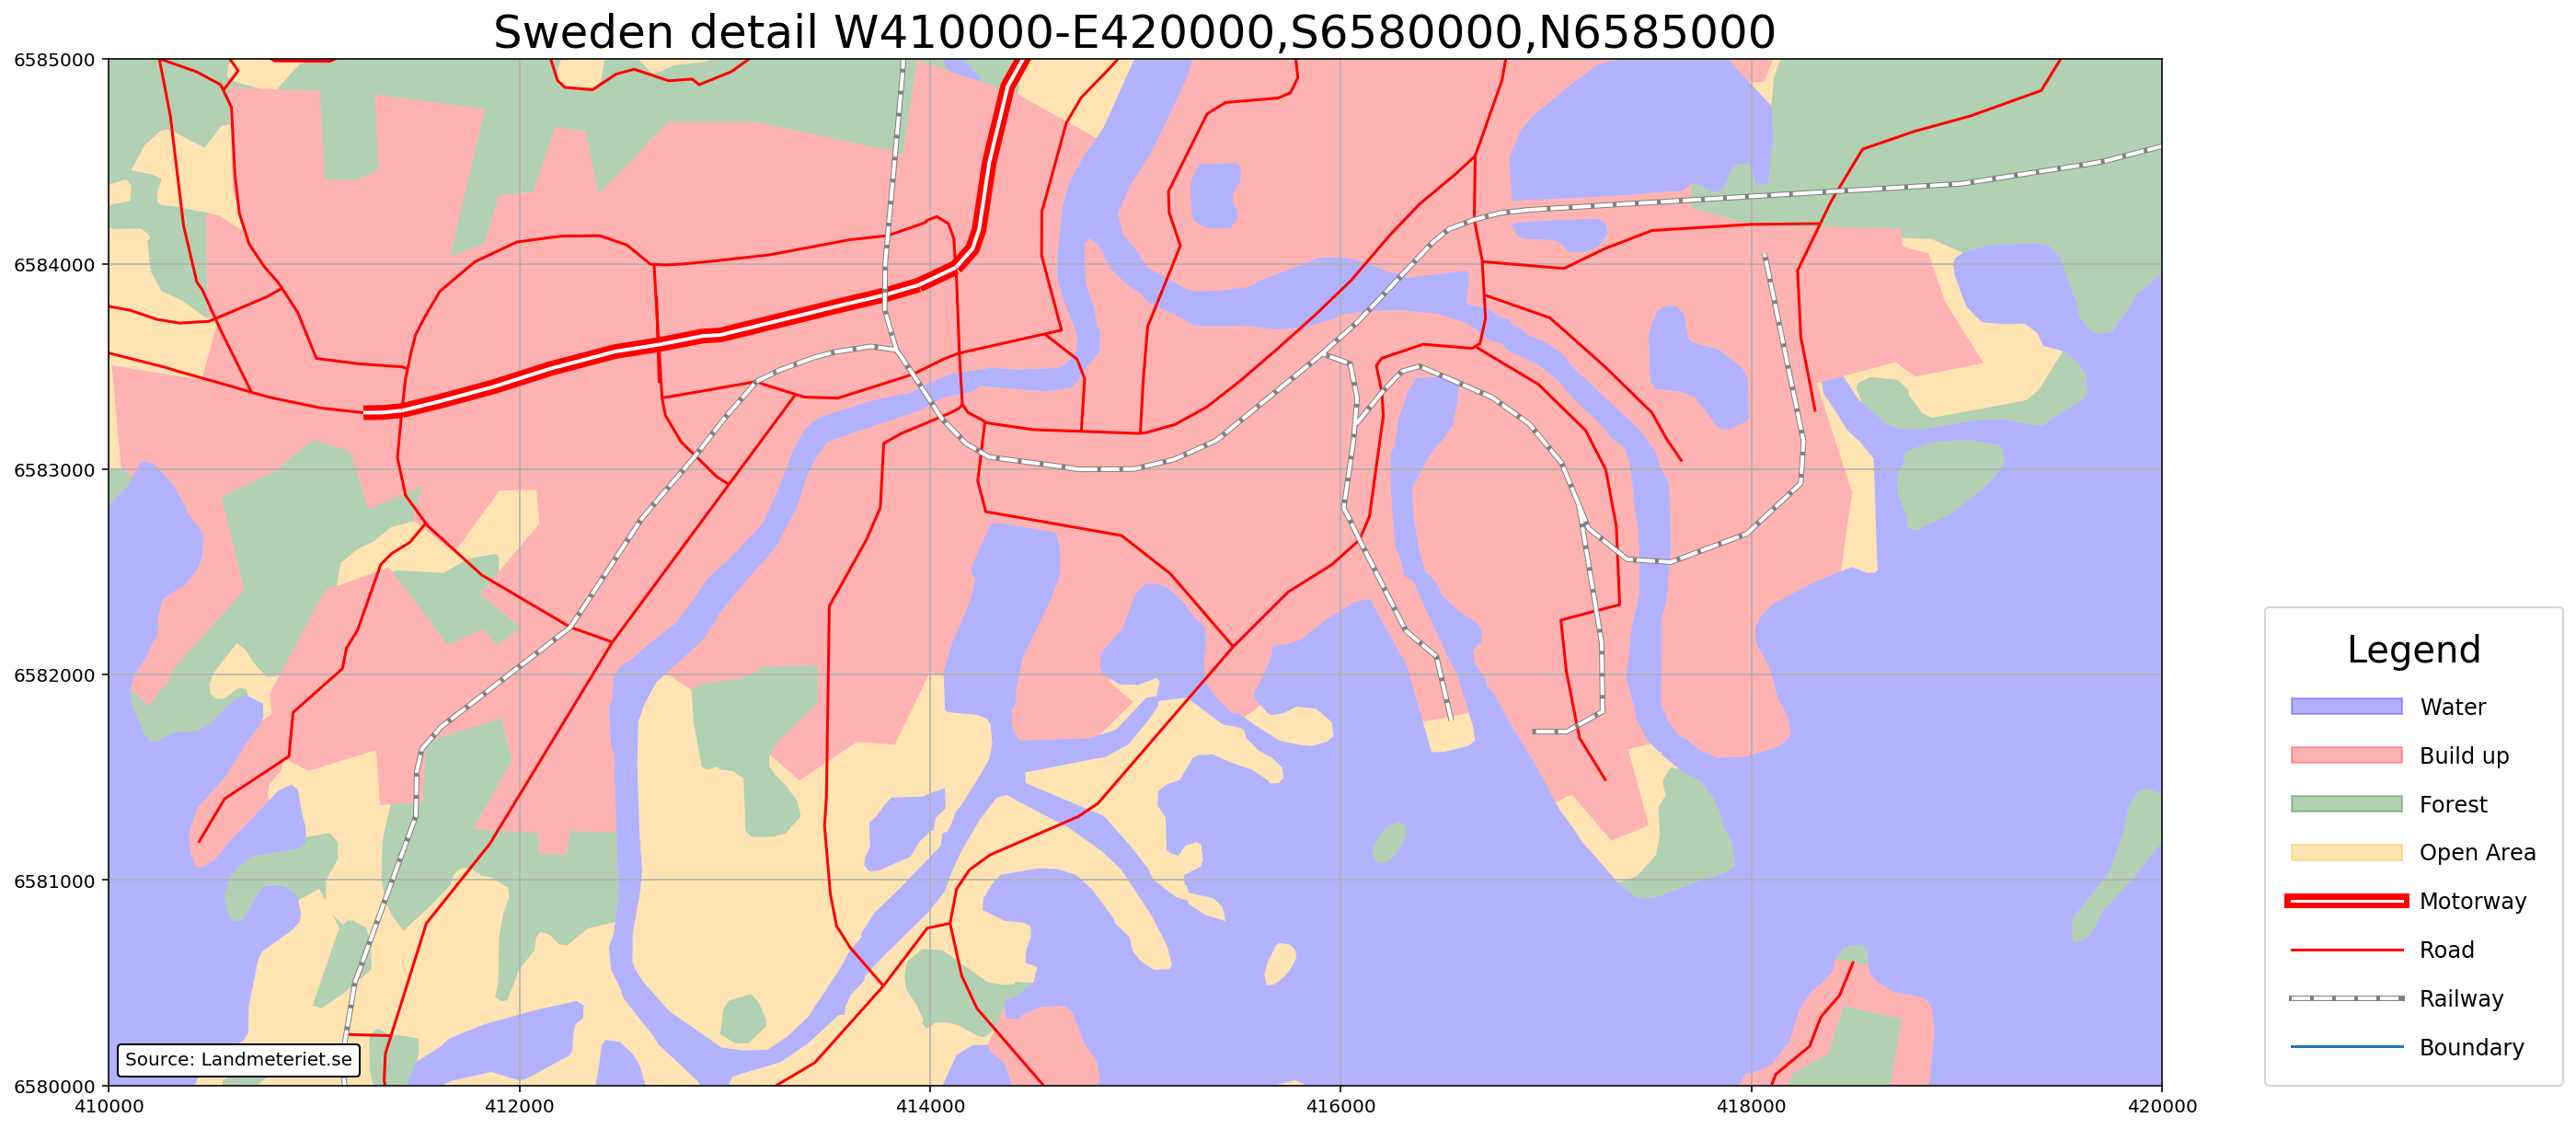

In [69]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='red')
outline2=mpe.withStroke(linewidth=2, foreground='white')

mapxwest,mapxeast = 410000,420000
mapysouth, mapynorth = 6580000,6585000

plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)



#define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

# map_df_sweden_road.loc[(map_df_sweden_road['KKOD'] > 5100) &(map_df_sweden_road['KKOD'] < 5300)].plot(ax=ax,color='red')#, lw=1,path_effects=[outline])
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] > 5100].plot(ax=ax,color='red')#, lw=1,path_effects=[outline])


road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5100].plot(ax=ax,color='white', lw=2,path_effects=[outline])
freeway_line = mlines.Line2D([], [], color='white', path_effects=[outline], label='Freeway')

map_df_sweden_rail.plot(ax=ax, color='grey', lw=3, label='railroad')
map_df_sweden_rail.plot(ax=ax, color='white', lw=2, linestyle=(0, (5, 1)))
rail_line_grey = mlines.Line2D([], [], color='grey', lw=3,label='Railroads') 
rail_line_white = mlines.Line2D([], [],color='white', lw=2, linestyle=(0, (5, 1))) 

#select data for labels
bounds=map_df_sweden_names['geometry'].cx[mapxwest:mapxeast*.97,mapysouth:mapynorth]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107, 5, 105, 7, 1]))]

texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
        
#add title     
ax.set_title(f'Sweden detail W{mapxwest}-E{mapxeast},S{mapysouth},N{mapynorth}', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend

plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, freeway_line, 
                    road_line, (rail_line_grey, rail_line_white), boundary_line], 
           labels=['Water','Build up','Forest', 'Open Area', 'Motorway','Road', 'Railway', 'Boundary'],
           bbox_to_anchor=(1.05, 0), loc='lower left', fontsize='12', borderaxespad=0., title='Legend', title_fontsize='20',
          handlelength=5, borderpad=1.2, labelspacing=1.2)

ax.grid(True)
# ax.axis('off')

plt.show()

## Appendix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='black')

x = np.linspace(0, 2*np.pi, 1000)

plt.plot(x, np.sin(x), lw=5, color='red', path_effects=[outline],
         label="stroke no alpha")

plt.plot(x, np.sin(x-np.pi/3.), lw=5, alpha=0.5, color='red', path_effects=[outline],
         label="stroke with alpha")

plt.plot(x, np.sin(x-2*np.pi/3.), lw=5, alpha=0.5, color='red',
         label="no stroke with alpha")

plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>